**imports**

In [ ]:
import numpy as np
from scipy.sparse import diags
from numpy.linalg import inv
from numpy.linalg import norm
import matplotlib.pyplot as plt
import time
import math

### **Jacobi Method**  

In [ ]:
from numpy import array, zeros, diag, diagflat, dot
from numpy.linalg import norm
def jacobi(A,b,x=None):
    """Solves the equation Ax=b via the Jacobi iterative method."""
    # Create an initial guess if needed                                                                                                                                                            
    if x is None:
        x_new = np.zeros(len(A[0]))

    # Create a vector of the diagonal elements of A                                                                                                                                                
    # and subtract them from A                                                                                                                                                                     
    D = np.diag(A)
    R = A - np.diagflat(D)
    condition = True
    e = 0.0001
    iter = 0
    x=[]                                                                                                                                                                       
    while condition:
        x = x_new
        x_new = np.dot(inv(np.diagflat(D)),b - np.dot(R,x))
        condition = norm(x_new - x) > e
        iter+=1
    return x, iter


In [ ]:
dim = [4, 16, 64, 256, 1024]
j_solutions = []
j_times = []
j_iters = []
j_errors = []
for n in dim:
    A = diags([-1, 4, -1], [-1, 0, 1], shape=(n, n)).toarray()   
    b = np.ones(n, dtype=int)
    
    s_time=time.time()
    sol,iter = jacobi(A,b)  
    e_time=time.time()
    error = norm(np.dot(A,sol)-b)

    j_errors.append(error)
    j_iters.append(iter)
    j_times.append(e_time - s_time)
    j_solutions.append(sol)        

    print(f'\n# of iterations for n={n} : {iter}')
    print(f"\n Jacobi Solution:\n{sol} \n")
    print(f"\n error : {error}")
    print("-"*100)


# of iterations for n=4 : 11

 Jacobi Solution:
[0.36360073 0.4544878  0.4544878  0.36360073] 


 error : 0.00022831289787792017
----------------------------------------------------------------------------------------------------

# of iterations for n=16 : 14

 Jacobi Solution:
[0.36601287 0.46407706 0.49034649 0.49737923 0.4992599  0.49976051
 0.49989271 0.49992499 0.49992499 0.49989271 0.49976051 0.4992599
 0.49737923 0.49034649 0.46407706 0.36601287] 


 error : 0.0003618913248813972
----------------------------------------------------------------------------------------------------

# of iterations for n=64 : 16

 Jacobi Solution:
[0.36602246 0.46409583 0.49037286 0.49741226 0.49929748 0.49980175
 0.49993643 0.49997213 0.49998156 0.49998396 0.49998457 0.4999847
 0.49998474 0.49998474 0.49998474 0.49998474 0.49998474 0.49998474
 0.49998474 0.49998474 0.49998474 0.49998474 0.49998474 0.49998474
 0.49998474 0.49998474 0.49998474 0.49998474 0.49998474 0.49998474
 0.49998474 0.4999847

### **Gaus Seidel** 

In [ ]:
from numpy import array, zeros, diag, diagflat, dot
from numpy.linalg import norm
def gaus_seidel(A,b,x=None):
    """Solves the equation Ax=b via the Gaus-Seidel iterative method."""
    # Create an initial guess if needed                                                                                                                                                            
    if x is None:
        x = np.zeros(len(A[0]))

    DL = np.tril(A,0)
    U = np.triu(A,1)
    condition = True
    e = 0.0001
    iter = 0

    while condition:
        x_new = np.dot(inv(DL), b - np.dot(U,x))
        condition = norm(x_new - x) > e
        x = x_new
        iter +=1
    return x, iter


In [ ]:
dim = [4, 16, 64, 256, 1024]
gs_solutions = []
gs_times = []
gs_iters = []
gs_errors = []
for n in dim:
    A = diags([-1, 4, -1], [-1, 0, 1], shape=(n, n)).toarray()   
    b = np.ones(n, dtype=int)

    s_time=time.time()
    sol,iter = gaus_seidel(A,b)  
    e_time=time.time()
    error = norm(np.dot(A,sol)-b)
    
    gs_errors.append(error)
    gs_iters.append(iter)
    gs_times.append(e_time - s_time)
    gs_solutions.append(sol)         

    print(f'\n# of iterations for n={next} : {iter}')
    print("\n gaus seidel Solution : \n", sol)
    print(f"\n error : {error}")
    print("-"*100)


# of iterations for n=<built-in function next> : 7

 gaus seidel Solution : 
 [0.36362858 0.45454036 0.45454339 0.36363585]

 error : 2.8208848504108126e-05
----------------------------------------------------------------------------------------------------

# of iterations for n=<built-in function next> : 10

 gaus seidel Solution : 
 [0.36601976 0.46409409 0.4903729  0.49741425 0.49930096 0.4998065
 0.49994195 0.49997698 0.49997865 0.49994654 0.499813   0.49930844
 0.49742218 0.49038088 0.46410155 0.36602539]

 error : 4.644885739190916e-05
----------------------------------------------------------------------------------------------------

# of iterations for n=<built-in function next> : 11

 gaus seidel Solution : 
 [0.36602352 0.46409911 0.49037834 0.49741982 0.49930658 0.49981213
 0.4999476  0.49998389 0.49999362 0.49999622 0.49999692 0.49999711
 0.49999716 0.49999717 0.49999718 0.49999718 0.49999718 0.49999718
 0.49999718 0.49999718 0.49999718 0.49999718 0.49999718 0.49999718
 

### **SOR** 

In [ ]:
from numpy import array, zeros, diag, diagflat, dot
from numpy.linalg import norm
def SOR(A,b,w,x=None):
    """Solves the equation Ax=b via the SOR iterative method."""
    # Create an initial guess if needed                                                                                                                                                            
    if x is None:
        x_new = np.zeros(len(A[0]))

    D = np.diagflat(np.diag(A))
    L = np.tril(A,-1)
    DWL = D + w*L
    U = np.triu(A,1)
    condition = True
    e = 0.0001
    iter = 0
                                                                                                                                                                       
    while condition:
        x = x_new
        x_new = np.dot(inv(DWL), w*b + np.dot((1-w)*D -w*U,x))
        condition = norm(x_new - x) > e

        iter +=1
    return x, iter


run SOR with w= 1.1, 1.3, 1.5, 1.7, 1.9 (later we will compare them)

In [ ]:
dim = [4, 16, 64, 256, 1024]
sor_solutions = []
wsor_times = []
wsor_iters = []
w_vals=[1.1,1.3,1.5,1.7,1.9]
for w in w_vals:
    t=[]
    iters=[]
    for n in dim:
        A = diags([-1, 4, -1], [-1, 0, 1], shape=(n, n)).toarray()   
        b = np.ones(n, dtype=int)
        s_time=time.time()
        sol,iter = SOR(A,b, w=w) 
        e_time=time.time() 
        iters.append(iter)
        t.append(e_time - s_time)
    wsor_iters.append(iters)
    wsor_times.append(t)

SOR with w=1.1 Results:

In [ ]:
dim = [4, 16, 64, 256, 1024]
sor_times = []
sor_iters = []
sor_errors = []
for n in dim:
    A = diags([-1, 4, -1], [-1, 0, 1], shape=(n, n)).toarray()   
    b = np.ones(n, dtype=int)
    
    s_time=time.time()
    sol, iter = SOR(A,b, w=1.1) 
    e_time=time.time() 
    error = norm(np.dot(A,sol)-b)

    sor_errors.append(error)
    sor_iters.append(iter)
    sor_times.append(e_time - s_time)       

    print(f'\n# of iterations for n={n} : {iter}')    
    print("\n SOR Solution : \n",sol)
    print(f"\n error : {error}")
    print("-"*100)


# of iterations for n=4 : 6

 SOR Solution : 
 [0.36354868 0.45451303 0.45453623 0.36363396]

 error : 0.00032001005885432844
----------------------------------------------------------------------------------------------------

# of iterations for n=16 : 8

 SOR Solution : 
 [0.36600729 0.46407914 0.49035752 0.49739882 0.49928554 0.49979109
 0.49992655 0.49996284 0.49997257 0.49997518 0.49981182 0.4993082
 0.49742243 0.49038105 0.46410162 0.3660254 ]

 error : 0.00018876516415419338
----------------------------------------------------------------------------------------------------

# of iterations for n=64 : 9

 SOR Solution : 
 [0.36602103 0.46409619 0.49037538 0.49741687 0.49930363 0.49980919
 0.49994465 0.49998095 0.49999068 0.49999328 0.49999398 0.49999417
 0.49999422 0.49999423 0.49999424 0.49999424 0.49999424 0.49999424
 0.49999424 0.49999424 0.49999424 0.49999424 0.49999424 0.49999424
 0.49999424 0.49999424 0.49999424 0.49999424 0.49999424 0.49999424
 0.49999424 0.49999424 0.4

## **Comparison** 

### time


First we compare Time for SOR with different w.

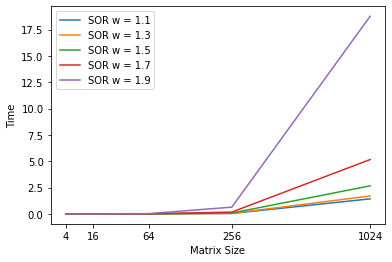

In [ ]:
x = [4, 16, 64, 256, 1024]
values =[1,2,4,7,12]
for w,t in zip(w_vals,wsor_times):
    plt.plot(values,t, label = "SOR w = "+str(w))
plt.ylabel("Time")
plt.xlabel('Matrix Size')
plt.legend()
plt.xticks(values, x)
plt.savefig("w_compare_times.png",dpi=500) 
plt.show()

Since SOR with w=1.5 runs in less time according to the above plot, next we compare it to other algorithms.

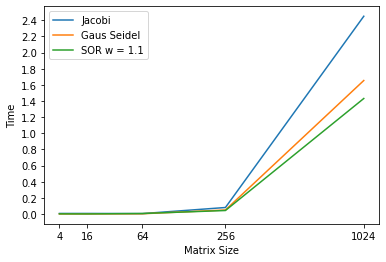

In [ ]:
x = [4, 16, 64, 256, 1024]
values =[1,2,4,7,12]
plt.plot(values,j_times, label = "Jacobi")
plt.plot(values,gs_times, label = "Gaus Seidel")
plt.plot(values,wsor_times[0], label = "SOR w = 1.1")
plt.ylabel("Time")
plt.xlabel('Matrix Size')
plt.legend()
plt.xticks(values, x)
plt.yticks(np.arange(0, max(sor_times+gs_times+j_times), 0.2))
plt.savefig("time.png",dpi=500) 
plt.show()


### Number of iterations

First we compare number of iterations for SOR with different w.

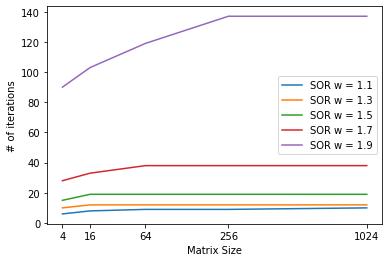

In [ ]:
x = [4, 16, 64, 256, 1024]
values =[1,2,4,7,12]
for w,t in zip(w_vals,wsor_iters):
    plt.plot(values,t, label = "SOR w = "+str(w))
plt.ylabel("# of iterations")
plt.xlabel('Matrix Size')
plt.legend()
plt.xticks(values, x)
plt.savefig("w_compare_iterations.png",dpi=500) 
plt.show()

Since SOR with w=1.1 has the lowest number of iterations, next we will compare it with other algorithms

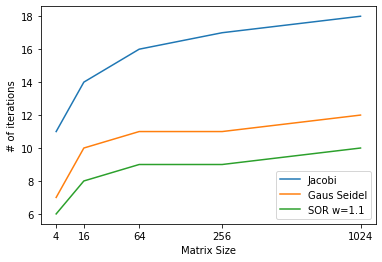

In [ ]:
x = [4, 16, 64, 256, 1024]
values =[1,2,4,7,12]
plt.plot(values,j_iters, label = "Jacobi")
plt.plot(values,gs_iters, label = "Gaus Seidel")
plt.plot(values,wsor_iters[0], label = "SOR w=1.1")
plt.ylabel("# of iterations")
plt.xlabel('Matrix Size')
plt.legend()
plt.xticks(values, x)
plt.savefig("iterations.png",dpi=500) 
plt.show()

### Error

In [ ]:
j_errors

[0.00022831289787792017,
 0.0003618913248813972,
 0.00022875498736396415,
 0.0002402487757697135,
 0.00024314049317735828]

In [ ]:
gs_errors

[2.8208848504108126e-05,
 4.644885739190916e-05,
 4.1783963826767065e-05,
 8.868054961678901e-05,
 5.99206169263756e-05]

In [ ]:
sor_errors

[0.00032001005885432844,
 0.00018876516415419338,
 9.345426804368328e-05,
 0.00018501743915916928,
 8.924125089592384e-05]

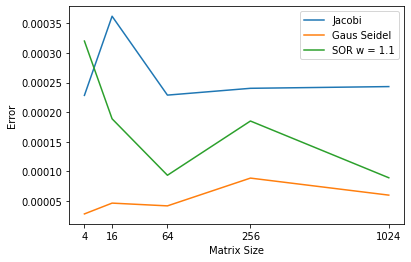

In [ ]:
x = [4, 16, 64, 256, 1024]
values =[1,2,4,7,12]
plt.plot(values,j_errors, label = "Jacobi")
plt.plot(values,gs_errors, label = "Gaus Seidel")
plt.plot(values,sor_errors, label = "SOR w = 1.1")
plt.ylabel("Error")
plt.xlabel('Matrix Size')
plt.legend()
plt.xticks(values, x)
plt.savefig("Error.png",dpi=500) 
plt.show()


## **LU Decomposition**

In [ ]:
def LU(A):
  n = A.shape[0]
  L = np.zeros_like(A)
  U = np.zeros_like(A)

  for i in range(0, n):
    L[i, i] = 1

  for k in range(n-1):
    for i in range(k+1,n):          
      A[i,k] = A[i,k]/A[k,k]      
      L[i,k] = A[i,k]/A[k,k]
      if math.isinf(A[i,k]/A[k,k]):
        raise Exception("This mtraix does not have LU decomposition")
      for j in range(k+1,n):      
        A[i,j] -= A[i,k]*A[k,j] 
        U[i,j] -= L[i,k]*A[k,j]
        if math.isinf(A[i,j]):
          raise Exception("This mtraix does not have LU decomposition")
    
  return L,U

In [ ]:
def LU_pivot(A):
  n = A.shape[0]
  L = np.zeros_like(A)
  U = np.zeros_like(A)

  for i in range(0, n):
    L[i, i] = 1

  n = A.shape[0]
  for k in range(n-1):
    max_row_index = np.argmax(abs(A[k:n,k])) + k
    A[[k,max_row_index]] = A[[max_row_index,k]]

    for i in range(k+1,n):          
      A[i,k] = A[i,k]/A[k,k]      
      L[i,k] = A[i,k]/A[k,k]
      for j in range(k+1,n):      
        A[i,j] -= A[i,k]*A[k,j]   
        U[i,j] -= L[i,k]*A[k,j]
    
  return L,U

In [ ]:
dim = [4,16,64,256,1024]
LU_times = []
for n in dim:
    A = diags([-1, 4, -1], [-1, 0, 1], shape=(n, n)).toarray()   
    s_time=time.time()
    L, U = LU(A) 
    e_time=time.time()
    LU_times.append(e_time - s_time)
    print(n, L, U)

In [ ]:
dim = [4,16,64,256,1024]
LU_PP_times = []
for n in dim:
    A = diags([-1, 4, -1], [-1, 0, 1], shape=(n, n)).toarray()   
    s_time=time.time()
    L, U = LU_pivot(A) 
    e_time=time.time()
    LU_PP_times.append(e_time - s_time)
    print(n, L, U)

In [ ]:
LU_times = []
dim = list(range(4,200,4))
for n in dim:
    A = diags([-1, 4, -1], [-1, 0, 1], shape=(n, n)).toarray()   
    s_time=time.time()
    L, U = LU(A) 
    e_time=time.time()
    LU_times.append(e_time - s_time)
    print(n, e_time - s_time)

In [ ]:
LU_PP_times = []
for n in dim:
    A = diags([-1, 4, -1], [-1, 0, 1], shape=(n, n)).toarray()   
    s_time=time.time()
    L, U = LU_pivot(A) 
    e_time=time.time()
    LU_PP_times.append(e_time - s_time)
    print(n, e_time - s_time)

As you can see, the plot for computation time of LU is similar to the plot of n^3.

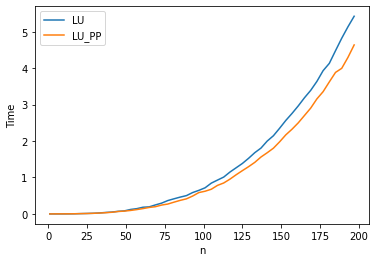

In [ ]:
plt.plot(dim,LU_times, label = "LU")
plt.plot(dim,LU_PP_times, label = "LU_PP")
plt.ylabel("Time")
plt.xlabel('n')
plt.legend()
plt.savefig("time.png",dpi=500) 
plt.show()